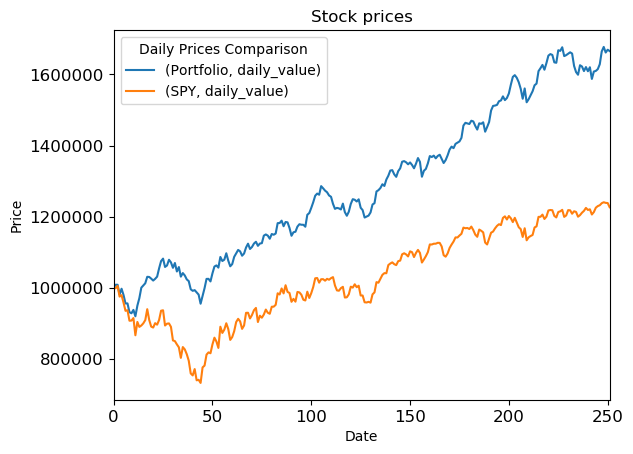

Start Date: 2009-01-01 00:00:00
End Date: 2010-01-01 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.3, 0.4, 0.1]
Sharpe Ratio: 27.960707768102154
Volatility (stdev of daily returns): 0.01191092303593521
Average Daily Return: 0.00209794118381024
Cumulative Return: [0.6657866]


In [13]:
"""Analyze a portfolio.
  		  	   		  		 			  		 			 	 	 		 		 	
Copyright 2017, Georgia Tech Research Corporation  		  	   		  		 			  		 			 	 	 		 		 	
Atlanta, Georgia 30332-0415  		  	   		  		 			  		 			 	 	 		 		 	
All Rights Reserved  		  	   		  		 			  		 			 	 	 		 		 	
"""

import datetime as dt

import numpy as np

import pandas as pd
from util import get_data, plot_data

df_temp = None

# This is the function that will be tested by the autograder  		  	   		  		 			  		 			 	 	 		 		 	
# The student must update this code to properly implement the functionality  		  	   		  		 			  		 			 	 	 		 		 	
def assess_portfolio(
        sd=dt.datetime(2008, 1, 1),
        ed=dt.datetime(2009, 1, 1),
        syms=["GOOG", "AAPL", "GLD", "XOM"],
        allocs=[0.1, 0.2, 0.3, 0.4],
        sv=1_000_000,
        rfr=0.0,
        sf=252.0,  # sampling freq or trading days
        gen_plot=False,
):
    """  		  	   		  		 			  		 			 	 	 		 		 	
    Estimate a set of test points given the model we built.  		  	   		  		 			  		 			 	 	 		 		 	

    :param sd: A datetime object that represents the start date, defaults to 1/1/2008  		  	   		  		 			  		 			 	 	 		 		 	
    :type sd: datetime  		  	   		  		 			  		 			 	 	 		 		 	
    :param ed: A datetime object that represents the end date, defaults to 1/1/2009  		  	   		  		 			  		 			 	 	 		 		 	
    :type ed: datetime  		  	   		  		 			  		 			 	 	 		 		 	
    :param syms: A list of 2 or more symbols that make up the portfolio (note that your code should support any symbol in the data directory)  		  	   		  		 			  		 			 	 	 		 		 	
    :type syms: list  		  	   		  		 			  		 			 	 	 		 		 	
    :param allocs:  A list of 2 or more allocations to the stocks, must sum to 1.0  		  	   		  		 			  		 			 	 	 		 		 	
    :type allocs: list  		  	   		  		 			  		 			 	 	 		 		 	
    :param sv: The starting value of the portfolio  		  	   		  		 			  		 			 	 	 		 		 	
    :type sv: int  		  	   		  		 			  		 			 	 	 		 		 	
    :param rfr: The risk free return per sample period that does not change for the entire date range (a single number, not an array)  		  	   		  		 			  		 			 	 	 		 		 	
    :type rfr: float  		  	   		  		 			  		 			 	 	 		 		 	
    :param sf: Sampling frequency per year  		  	   		  		 			  		 			 	 	 		 		 	
    :type sf: float  		  	   		  		 			  		 			 	 	 		 		 	
    :param gen_plot: If True, optionally create a plot named plot.png. The autograder will always call your  		  	   		  		 			  		 			 	 	 		 		 	
        code with gen_plot = False.  		  	   		  		 			  		 			 	 	 		 		 	
    :type gen_plot: bool  		  	   		  		 			  		 			 	 	 		 		 	
    :return: A tuple containing the cumulative return, average daily returns,  		  	   		  		 			  		 			 	 	 		 		 	
        standard deviation of daily returns, Sharpe ratio and end value  		  	   		  		 			  		 			 	 	 		 		 	
    :rtype: tuple  		  	   		  		 			  		 			 	 	 		 		 	
    """

    # Read in adjusted closing prices for given symbols, date range  		  	   		  		 			  		 			 	 	 		 		 	
    dates = pd.date_range(sd, ed)
    # prices_all is a df
    prices_all = get_data(syms, dates)  # automatically adds SPY
    prices = prices_all[syms]  # only portfolio symbols  		  	   		  		 			  		 			 	 	 		 		 	
    prices_SPY = prices_all["SPY"]  # only SPY, for comparison later  		  	   		  		 			  		 			 	 	 		 		 	

    # Get daily portfolio value  		  	   		  		 			  		 			 	 	 		 		 	
    # port_val = prices_SPY  # add code here to compute daily portfolio values
    # day one divide the sv by alloc over the portfolio should sum to sv
    # I now have num shares for each stock, using this calculate pv on each day
    # print(f'prices_all shape: {prices_all.shape}, prices_all[0]: {prices_all.iloc[0].values}')

    normed = prices / prices.iloc[0].values
    normed = pd.DataFrame(normed)
    allocs = np.asarray(allocs)
    alloced = normed.values * allocs
    pos_vals = alloced * sv
    pos_vals = pd.DataFrame(pos_vals)
    port_vals = pos_vals.sum(axis=1)

    # do same for SPY but not sum
    '''
    normedSPY = pd.DataFrame(prices_SPY)
    allocedSPY = normedSPY.values * 1.0
    pos_valsSPY = allocedSPY * sv
    pos_valsSPY = pd.DataFrame(pos_valsSPY)
    '''


    # day_i / day_(i-1) - 1
    daily_rets = [((port_vals[i] / port_vals[i - 1]) - 1) for i in range(1, len(port_vals))]
    daily_rets = [0] + daily_rets
    daily_rets = np.asarray(daily_rets)
    assert len(daily_rets) == len(port_vals)

    # todo: do the daily rets for SPY then make another dataframe start at 1m and use the daily rets
    #  to fill in values.

    drspy = [((prices_SPY[i] / prices_SPY[i - 1]) - 1) for i in range(1, len(prices_SPY))]
    drspy = [0] + drspy
    #drspy = np.asarray(drspy)
    drspy = pd.DataFrame(drspy)
    spyVal, dailySpyVals = calculateSPYEndValFromSV(drspy, startingValue=1_000_000)

    # Get portfolio statistics (note: std_daily_ret = volatility)
    # cumulative return, average daily returns,  		  	   
    # standard deviation of daily returns, Sharpe ratio and end value    		  	   		  		 			  		 			 	 	 		 		 	
    cr, adr, sddr, sr = [
        0.25,
        0.001,
        0.0005,
        2.1,
    ]  # add code here to compute stats  	
    port_vals = pd.DataFrame(port_vals, columns=['daily_value'])
    cr = (port_vals.iloc[-1].values / port_vals.iloc[0].values) - 1
    adr = daily_rets.mean()
    sddr = daily_rets.std()
    sharpeRatioAdjustment = np.sqrt(sf)
    # 10 basis points is 1 percent
    basis_pt_factor = 10.
    sr = sharpeRatioAdjustment * ((adr * basis_pt_factor - (calculate_daily_rf(rfr, sf) * basis_pt_factor)) / daily_rets.std())


    # Compare daily portfolio value with SPY using a normalized plot  		  	   		  		 			  		 			 	 	 		 		 	
    if gen_plot:
        # add code to plot here
        dailySpyValsDf = pd.DataFrame(dailySpyVals, columns=['daily_value'])

        df_temp = pd.concat(
            [port_vals, dailySpyValsDf], keys=["Portfolio", "SPY"], axis=1
        )
        
        df_temp.to_csv('portfolioVsSPY.csv', index=False)
        
        #datesDf = pd.DataFrame(dates, columns=['dates'])
        
        #assert datesDf.shape[0] == df_temp.shape[0], f'datesDf.shape[0]: {datesDf.shape[0]}, df_temp.shape[0]: {df_temp.shape[0]}'
        #dfTableau = pd.concat(
            #[datesDf, df_temp], keys=['dates', 'port_vals', 'spy_vals'], axis=1)
        #dfTableau.to_csv('portfolioVsSPYTableau.csv', index=False)
        

        plot_data(df_temp, title="Stock prices", xlabel="Date", ylabel="Price")

        
    # Add code here to properly compute end value  		  	   		  		 			  		 			 	 	 		 		 	
    ev = port_vals['daily_value'].iloc[-1]
    #ev = np.asarray(port_vals)[-1][0]

    return cr, adr, sddr, sr, ev


def calculateSPYEndValFromSV(dailyReturnSPY, startingValue=1_000_000):
    '''
    dailyReturnSPY is the daily return of spy, now multiply by each days's return + 1 since there
    negative values to get a final value and return
    also need each day's value for plot
    '''
    dailyReturnSPY = np.asarray(dailyReturnSPY).flatten()
    spyDailyVal = [0 for x in dailyReturnSPY]
    spyDailyVal[0] = startingValue
    for i in range(1, len(dailyReturnSPY)):
        dailyReturn = dailyReturnSPY[i]
        spyDailyVal[i] = spyDailyVal[i-1] * (1+dailyReturn)

    finalValue = spyDailyVal[-1]
    #print(finalValue)
    return finalValue, spyDailyVal


def calculate_daily_rf(rfr, sf=252.0):
    if rfr < -1.0:
        raise ValueError("Risk-free rate cannot be negative.")
    if sf <= 0.0:
        raise ValueError("Sampling frequency must be positive.")
    daily_rf = ((1 + rfr) ** (1 / sf)) - 1.0

    return daily_rf



def test_code():
    """  		  	   		  		 			  		 			 	 	 		 		 	
    Performs a test of your code and prints the results  		  	   		  		 			  		 			 	 	 		 		 	
    """
    # This code WILL NOT be tested by the auto grader  		  	   		  		 			  		 			 	 	 		 		 	
    # It is only here to help you set up and test your code  		  	   		  		 			  		 			 	 	 		 		 	

    # Define input parameters  		  	   		  		 			  		 			 	 	 		 		 	
    # Note that ALL of these values will be set to different values by  		  	   		  		 			  		 			 	 	 		 		 	
    # the autograder!  		  	   		  		 			  		 			 	 	 		 		 	
    start_date = dt.datetime(2009, 1, 1)
    end_date = dt.datetime(2010, 1, 1)
    symbols = ["GOOG", "AAPL", "GLD", "XOM"]
    allocations = [0.2, 0.3, 0.4, 0.1]
    start_val = 1000000
    risk_free_rate = 0.0
    sample_freq = 252

    # Assess the portfolio  		  	   		  		 			  		 			 	 	 		 		 	
    cr, adr, sddr, sr, ev = assess_portfolio(
        sd=start_date,
        ed=end_date,
        syms=symbols,
        allocs=allocations,
        sv=start_val,
        gen_plot=True,
    )

    # Print statistics  		  	   		  		 			  		 			 	 	 		 		 	
    print(f"Start Date: {start_date}")
    print(f"End Date: {end_date}")
    print(f"Symbols: {symbols}")
    print(f"Allocations: {allocations}")
    print(f"Sharpe Ratio: {sr}")
    print(f"Volatility (stdev of daily returns): {sddr}")
    print(f"Average Daily Return: {adr}")
    print(f"Cumulative Return: {cr}")


if __name__ == "__main__":
    test_code()


In [ ]:
sd=dt.datetime(2008, 1, 1)
ed=dt.datetime(2009, 1, 1)

dates = pd.date_range(sd, ed)
